In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("../../data/Symphony-Data.csv")
data.head()

,DATE,PRICE,OPEN,HIGH,LOW,VOLUME,CHANGE(%)
0,13-Jun-24,1242.20,1244.0,1260.90,1226.80,154710,1.18%
1,12-Jun-24,1227.70,1210.0,1244.00,1204.00,246676,1.51%
2,11-Jun-24,1209.40,1163.4,1221.00,1157.30,472663,3.96%
3,10-Jun-24,1163.30,1145.0,1169.95,1137.05,157659,1.08%
4,07-Jun-24,1150.85,1108.0,1160.75,1103.70,359926,3.90%


In [6]:
data = data.drop(["OPEN", "HIGH", "LOW", "VOLUME", "CHANGE(%)"],axis=1)


In [9]:
data["DATE"] = pd.to_datetime(data["DATE"], format="%d-%b-%y")
data = data.sort_values(by="DATE")
data.head()

,DATE,PRICE
1238,2019-06-18,1204.90
1237,2019-06-19,1243.95
1236,2019-06-20,1254.45
1235,2019-06-21,1232.55
1234,2019-06-24,1228.65


In [11]:
data.tail()
data["MONTH"]= data["DATE"].dt.month
data["YEAR"]= data["DATE"].dt.year

In [36]:
#estimate the trend
dataByYear = data.groupby(["YEAR"])["PRICE"].mean()
print(dataByYear)

#Here the index contains the YEAR which is X

len1 = len(dataByYear)
if len1%2!=0:
    print("Use deviations and normal equations to find the trend line")
    middleIdx = len1//2 
    deviations =  (dataByYear.index - dataByYear.index[middleIdx]).values
   
    sumXY = 1
    sumX2=1
    a = dataByYear.sum()/len1
    b = sumXY/ sumX2
    
    
else:
    # sum of deviations != 0
    X = dataByYear.index.values - dataByYear.index.values.mean()
    Y = dataByYear - dataByYear.mean()
    
    b = (X*Y).sum()/ (X**2).sum()
    xMean = dataByYear.index.values.mean()
    yMean = dataByYear.mean()
    
    a = yMean - b*xMean
    print("Equation of trend line", f"y = {a} + {b}t")
    print()


trendVal = a+ (b*np.array(dataByYear.index.values))
trendVal

YEAR
2019    1222.831061
2020     948.527778
2021    1066.306855
2022     957.801613
2023     929.385163
2024     950.287168
Name: PRICE, dtype: float64
Equation of trend line y = 89303.12696975323 + -43.6757871367508t



array([1121.71274065, 1078.03695352, 1034.36116638,  990.68537924,
        947.00959211,  903.33380497])

Text(0.5, 1.0, 'Trend')

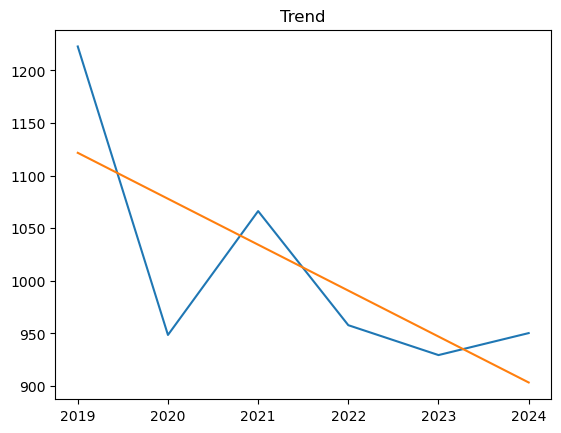

In [37]:
# Plot the data and the trend line
plt.plot(dataByYear.index, dataByYear, label="og")
plt.plot(dataByYear.index, trendVal, label="Linear trend")
plt.title("Trend")

In [46]:
#form the trend table
perYearVariation = pd.Series(trendVal).diff()[1]
perMonthVariation = perYearVariation/12
val6 = trendVal[0]-(perMonthVariation/2)
val7= trendVal[1]-(perMonthVariation/2)
trendTable = []
for i in range(len(dataByYear.index)):
    row = []
    for j in range(12):
        if(i==0):
            if(j==5):
                row.append(val6)
            elif(j==6):
                row.append(val7)
            elif(j<5): 
                row.append(val6-(5-j)*perMonthVariation)
            elif(j>6):
                row.append(val7+(j-6)*perMonthVariation)
        else:
            row.append(trendTable[i-1][j]+perYearVariation)
    trendTable.append(row)

trendTable = pd.DataFrame(trendTable)
trendTable.shape

(6, 12)

In [60]:
monthYear = data.groupby(["YEAR", "MONTH"])["PRICE"].mean().unstack()
print(monthYear.shape)
monthYear

(6, 12)


MONTH,1,2,3,4,5,6,7,8,9,10,11,12
YEAR,,,,,,,,,,,,
2019,NaN,NaN,NaN,NaN,NaN,1228.622222,1232.097826,1243.562500,1262.131579,1262.175000,1208.607500,1130.973810
2020,1190.458696,1308.130000,1026.030952,909.255556,821.036842,893.779545,869.536957,859.064286,868.395455,859.559524,836.897500,926.211364
2021,1035.175000,1041.697500,1302.271429,1228.252632,1092.557500,1063.502273,1038.233333,927.695238,1013.559524,1065.400000,1022.830000,984.352174
2022,1029.857500,982.315000,1048.930952,1141.181579,1064.476190,913.806818,895.857143,918.367500,889.140909,861.802632,852.154762,914.211364
2023,960.028571,1051.925000,1118.080952,991.452941,893.897727,894.361905,878.388095,881.825000,892.525000,858.872500,866.192857,879.180000
2024,922.436364,921.442857,859.702632,954.280000,1001.145455,1143.711111,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
trendTable.index = monthYear.index
trendTable.columns = monthYear.columns

In [56]:
ratioTable = (monthYear/trendTable)*100
ratioTable

MONTH,1,2,3,4,5,6,7,8,9,10,11,12
YEAR,,,,,,,,,,,,
2019,NaN,NaN,NaN,NaN,NaN,109.353503,114.098263,115.549406,117.672765,118.077494,113.452507,106.528961
2020,108.415213,119.527743,94.064337,83.637695,75.776608,82.768341,83.917478,83.199021,84.400236,83.838032,81.918476,90.984977
2021,98.178622,99.139455,124.369354,117.709571,105.071727,102.636729,104.607344,93.814092,102.875850,108.538602,104.589554,101.031011
2022,101.895121,97.542479,104.535151,114.142755,106.859578,92.070733,94.417092,97.162235,94.433731,91.885383,91.210679,98.235627
2023,99.276227,109.190169,116.497302,103.696674,93.850578,94.259504,97.042984,97.816009,99.404223,96.045537,97.260014,99.123362
2024,99.900849,100.188171,93.846563,104.586318,110.162066,126.355469,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
monthlyAvg = ratioTable.mean(axis=0)
monthlyAvg

MONTH
1     101.533206
2     105.117604
3     106.662542
4     104.754603
5      98.344112
6     101.240713
7      98.816632
8      97.508153
9      99.757361
10     99.677010
11     97.686246
12     99.180788
dtype: float64

In [67]:
generalAvg = monthlyAvg.mean()

In [68]:
seasonalIndices = monthlyAvg*100/generalAvg
seasonalIndices.T

MONTH
1     100.670879
2     104.224834
3     105.756650
4     103.864916
5      97.508869
6     100.380870
7      97.977377
8      96.680010
9      98.910116
10     98.830447
11     96.856591
12     98.338440
dtype: float64

In [71]:
deseasonalizedData = monthYear*100/seasonalIndices
deseasonalizedData

MONTH,1,2,3,4,5,6,7,8,9,10,11,12
YEAR,,,,,,,,,,,,
2019,NaN,NaN,NaN,NaN,NaN,1223.960522,1257.532978,1286.266414,1276.038923,1277.111495,1247.831956,1150.083136
2020,1182.525381,1255.103944,970.181022,875.421260,842.012472,890.388322,887.487483,888.564538,877.964247,869.731494,864.058385,941.860953
2021,1028.276509,999.471491,1231.384903,1182.548140,1120.469867,1059.467079,1059.666390,959.552276,1024.727869,1078.007873,1056.025186,1000.984130
2022,1022.994445,942.496106,991.834506,1098.717087,1091.671144,910.339606,914.351017,949.904223,898.938294,872.001147,879.810810,929.658196
2023,953.630862,1009.284411,1057.220465,954.560000,916.734788,890.968472,896.521342,912.106855,902.359674,869.036340,894.304501,894.034931
2024,916.289172,884.091462,812.906448,918.770300,1026.722451,1139.371585,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
finalData = deseasonalizedData.stack()
finalData = finalData.fillna(0)

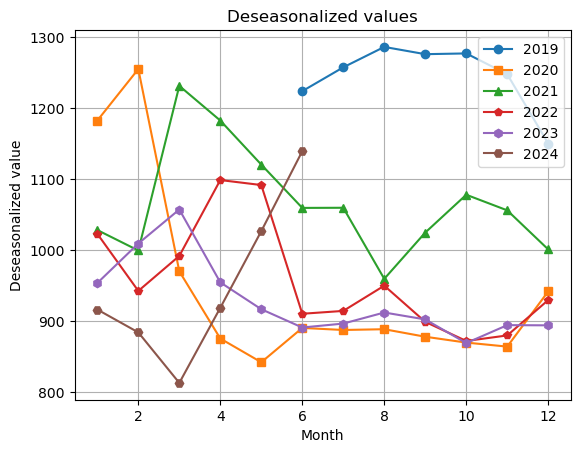

In [99]:
markers=["o","s", "^", "p","h", "H"]
for idx, year in enumerate(range(2019, 2025)):
    plt.plot(finalData[year].index, finalData[year], label=str(year), marker=markers[idx])

plt.xlabel("Month")
plt.ylabel("Deseasonalized value")
plt.title("Deseasonalized values")
plt.legend()
plt.grid()